<a href="https://colab.research.google.com/github/Alfaxad/gemma2-swahili-models/blob/main/gemma2_2b_swahili_preview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introducing Gemma2-2B-Swahili-Preview

Authors: [Alfaxad Eyembe](https://alfaxad.github.io/), [Mrina Mtenga](https://www.kaggle.com/mrinaeliseus)

Note: This model was trained in the google colab environment

The Gemma2-2B-Swahili-Preview model is a fine-tuned version of Google's Gemma-2B model, adapted specifically for the Swahili language using a focused subset of the Swahili Inkuba-Mono dataset. This notebook details the process of creating and evaluating this model.

## Objectives

1. Fine-tune the Gemma2-2B model for Swahili language modeling
2. Use a focused dataset approach for efficient training
3. Evaluate the fine-tuned model's performance on Swahili text generation

## Key Components

1. **Base Model**: Gemma2-2B
   - 2 billion parameter causal language model from Google
   - Pretrained on a large corpus of English web pages, books, and articles

2. **Fine-tuning Data**: Inkuba-Mono Swahili Subset
   - Swahili text data extracted from the larger Inkuba-Mono dataset
   - Covers a diverse range of topics and styles
   - Released under CC BY-NC 4.0 license

3. **Fine-tuning Method**: Low-Rank Adaptation (LoRA)
   - Parameter-efficient fine-tuning technique
   - Adapts model to new domain with minimal additional parameters
   - Enables fast and memory-efficient training

4. **Evaluation Approach**: Direct Text Continuation
   - Assess model's ability to continue Swahili text prompts
   - Evaluate coherence, relevance, and language quality
   - Test understanding of cultural context and domain knowledge

## Notebook Structure

1. Dataset Overview and Processing
2. Model Training with LoRA
3. Evaluation and Comparative Analysis
4. Conclusion and Future Work

## Achievements.
- Fine-tuned model showed significant improvements in coherence, relevance, and language quality
- Demonstrated better understanding of local context and culture
- Exhibited stronger grasp of domain knowlege

In [ ]:
#  Initial installations
!pip install --quiet transformers accelerate datasets bitsandbytes evaluate peft sentencepiece
!pip install --quiet kagglehub

In [ ]:
# Import libraries and set seed
import os
import torch
import random
import numpy as np
from datasets import load_dataset, Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    TrainingArguments,
    Trainer,
    DataCollatorForLanguageModeling
)
from peft import LoraConfig, get_peft_model

# Set random seed function
def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# Set seed
set_seed(42)

In [ ]:
# Kaggle authentication
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


# Dataset

In [ ]:
dataset_path=kagglehub.dataset_download('alfaxadeyembe/inkuba-mono-swahili')

100%|██████████| 3.29G/3.29G [02:52<00:00, 20.5MB/s]

Extracting files...


# Gemma 2 2B Model

The **Gemma 2 2B** model is a state-of-the-art language model developed by Google, designed to perform a variety of natural language processing tasks efficiently. It employs a **transformer decoder architecture** with **2 billion parameters** and a context length of **8,192 tokens**. Key architectural features include:

- **Multi-Query Attention (MQA)** with a single query head per key-value head, enhancing inference efficiency.
- **Rotary Positional Embeddings (RoPE)** for positional encoding, enabling better handling of long-range dependencies.
- **GeGLU activations** replacing standard ReLU functions, improving model expressiveness.
- **RMSNorm** for layer normalization, contributing to training stability.

These features collectively contribute to its robust performance.

---

## Training Process

The training process utilized **TPUv5e** hardware and was implemented using **JAX** and **Flax**. The model was trained on approximately **2 trillion tokens**, primarily sourced from:

- English web documents,
- Code, and
- Mathematical content.



---

## Performance

The **Gemma 2 2B** model demonstrates impressive results across various benchmarks, including:

- **MMLU** (Massive Multitask Language Understanding): 5-shot, top-1 accuracy of 51.3%.
- **HellaSwag**: 10-shot accuracy of 73.0%.
- **PIQA** (Physical Interaction QA): 0-shot accuracy of 77.8%.

This showcases its applicability in tasks like:

- **Question answering**,
- **Commonsense reasoning**, and
- **Basic coding challenges**.



---

## Usage

Gemma models are well-suited for a variety of text generation tasks, including question answering, summarization, and reasoning. Their relatively small size makes it possible to deploy them in environments with limited resources such as a laptop, desktop, or your own cloud infrastructure, democratizing access to state-of-the-art AI models and helping foster innovation for everyone.

To get started with the Gemma 2 2B model, you can use the Hugging Face Transformers library:

```python
import torch
from transformers import pipeline

pipe = pipeline("text-generation", model="google/gemma-2-2b", device="cuda")
text = "Once upon a time,"
outputs = pipe(text, max_new_tokens=256)
response = outputs[0]["generated_text"]
print(response)
```



For more detailed information and resources, you can refer to the [Gemma Technical Report](https://arxiv.org/abs/2408.00118) and the [Gemma Model Card](https://ai.google.dev/gemma/docs/model_card).

In [ ]:
model_path = kagglehub.model_download('google/gemma-2/transformers/gemma-2-2b')

In [ ]:
print(f"Model downloaded to: {model_path}")
print(f"Dataset downloaded to: {dataset_path}")

Model downloaded to: /root/.cache/kagglehub/models/google/gemma-2/transformers/gemma-2-2b/2
Dataset downloaded to: /root/.cache/kagglehub/datasets/alfaxadeyembe/inkuba-mono-swahili/versions/1


# Dataset Analysis and Processing

## Dataset Overview

### Inkuba-Mono Swahili Subset
The dataset used for fine-tuning is derived from the Swahili portion of the Inkuba-Mono dataset, originally collected by Lelapa AI's Fundamental Research Team. This dataset represents a comprehensive collection of Swahili text from various public sources including Hugging Face, GitHub, and Zenodo, originally created for training InkubaLM.

### License and Attribution
- Released under CC BY-NC 4.0 license
- Originally part of InkubaLM project


## Focused Dataset Approach

### Motivation for Dataset Focus
Given the large size of the original dataset (44,382,869 examples), we adopted a focused dataset approach for several reasons:
1. Computational efficiency
2. Quality control
3. Balanced representation
4. Training time optimization

### Focused Dataset Creation
- Selected 1,000,000 random examples
- Maintained dataset diversity
- Ensured quality representation
- Balanced computational requirements

## Dataset Statistics

### Token Distribution Analysis
Based on our analysis of the focused dataset:
- Average length: 60.72 tokens
- Median length: 41.00 tokens
- 95th percentile: 151.00 tokens
- Max length: 22,817 tokens
- Total tokens: 60,720,534

### Impact on Tokenization Choices
These statistics informed our tokenization strategy:
1. Chosen max_length = 256 tokens because:
   - Covers 95th percentile (151 tokens)
   - Efficient batch processing
   - Minimal information loss
   - Optimal memory usage

2. Processing Efficiency:
   - Most examples fully preserved
   - Minimal padding waste
   - Efficient GPU utilization
   - Better training dynamics

## Data Quality and Characteristics

### Content Distribution
- News articles
- Social media content
- Forum discussions
- Government documents
- Educational material
- Cultural content

### Language Characteristics
- Natural Swahili text
- Mixed formal and informal language
- Rich cultural context
- Diverse vocabulary
- Real-world applications



In [ ]:
# Load the dataset
swahili_language_dataset = load_dataset("text", data_files="/root/.cache/kagglehub/datasets/alfaxadeyembe/inkuba-mono-swahili/versions/1/data.txt", split="train")
print("Dataset Info:", swahili_language_dataset)
print("\nDataset size:", len(swahili_language_dataset))

# Print a few examples
print("\nSample entries:")
for i in range(1,11):  # Show 10 examples
    print(f"\nExample {i}:")
    print("-" * 50)
    print(swahili_language_dataset[i]['text'])
    print("-" * 50)

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/17 [00:00<?, ?it/s]

Dataset Info: Dataset({
    features: ['text'],
    num_rows: 44382869
})

Dataset size: 44382869

Sample entries:

Example 1:
--------------------------------------------------
kwa inavyosemekana ni kwamba uchawi hauvuki bahari sa huyo jamaa haoni kama kuna wezekano wa bibie kwenda kufanyia uo upuuz zenj. so kama vip labda amfungie meter."
--------------------------------------------------

Example 2:
--------------------------------------------------
changamoto ambazo wengi wetu tunakutana nazo na jinsi ya kuzivuka ili kupiga hatua zaidi.
--------------------------------------------------

Example 3:
--------------------------------------------------
Walikamatwa Ngorongoro, wakapakiwa kwenye malori, wakasafirishwa, njiani magari yalipimwa uzito, yakafika Uwanja wa Ndege wa Kilimanjaro (umbali wa km 300), wakashushwa, wakaingizwa kwenye ndege na kutoroshwa.
--------------------------------------------------

Example 4:
--------------------------------------------------
← John Ngahyoma

In [ ]:
# Initialize tokenizer
model_id = "/root/.cache/kagglehub/models/google/gemma-2/transformers/gemma-2-2b/2"
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Create a focused dataset of 1M examples
focused_size = 1_000_000
indices = random.sample(range(len(swahili_language_dataset)), focused_size)
swahili_focused_dataset = swahili_language_dataset.select(indices)

# Now analyze sequence lengths for this focused dataset
def check_sequence_lengths(examples):
    lengths = []
    total = len(examples)

    # Process in batches to show progress
    for idx in range(total):
        tokens = tokenizer(examples[idx]['text'])
        lengths.append(len(tokens['input_ids']))

        # Print progress every 100,000 examples
        if (idx + 1) % 100000 == 0:
            print(f"Processed {idx + 1}/{total} examples ({(idx + 1)/total*100:.2f}%)")
            print(f"Current average: {sum(lengths)/len(lengths):.2f} tokens")

    print("\nFinal Statistics:")
    print(f"Average length: {sum(lengths)/len(lengths):.2f} tokens")
    print(f"Max length: {max(lengths)} tokens")
    print(f"95th percentile: {np.percentile(lengths, 95):.2f} tokens")
    print(f"Median length: {np.percentile(lengths, 50):.2f} tokens")

check_sequence_lengths(swahili_focused_dataset)

Processed 100000/1000000 examples (10.00%)
Current average: 61.24 tokens
Processed 200000/1000000 examples (20.00%)
Current average: 60.93 tokens
Processed 300000/1000000 examples (30.00%)
Current average: 60.73 tokens
Processed 400000/1000000 examples (40.00%)
Current average: 60.82 tokens
Processed 500000/1000000 examples (50.00%)
Current average: 60.84 tokens
Processed 600000/1000000 examples (60.00%)
Current average: 60.85 tokens
Processed 700000/1000000 examples (70.00%)
Current average: 60.88 tokens
Processed 800000/1000000 examples (80.00%)
Current average: 60.86 tokens
Processed 900000/1000000 examples (90.00%)
Current average: 60.88 tokens
Processed 1000000/1000000 examples (100.00%)
Current average: 60.83 tokens

Final Statistics:
Average length: 60.83 tokens
Max length: 54585 tokens
95th percentile: 151.00 tokens
Median length: 41.00 tokens


In [ ]:
# Count total tokens
total_tokens = sum(len(tokenizer(example['text'])['input_ids']) for example in swahili_focused_dataset)
print(f"Total tokens in focused dataset: {total_tokens:,}")

# Set up tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        truncation=True,
        max_length=256,  # Covers well beyond 95th percentile (151 tokens)
        padding="max_length",
        return_tensors=None
    )

# Tokenize the dataset
tokenized_dataset = swahili_focused_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=swahili_focused_dataset.column_names
)

Total tokens in focused dataset: 60,831,073


Map:   0%|          | 0/1000000 [00:00<?, ? examples/s]


# Fine-tuning Gemma2-2B for Swahili Language Modeling

## Fine-tuning Method: Low-Rank Adaptation (LoRA)

The Gemma2-2B-Swahili-Preview model was fine-tuned using Low-Rank Adaptation (LoRA), a parameter-efficient technique that adapts pretrained language models to new domains or tasks with minimal additional parameters. Key aspects of LoRA include:

- Adds trainable rank decomposition matrices to key matrices in the model
- Freezes original model weights, preserving pretrained knowledge
- Significantly reduces number of trainable parameters during fine-tuning
- Enables fast and memory-efficient adaptation
- Maintains close to original model performance

LoRA configuration used for Gemma2-2B-Swahili-Preview:
```python
lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"]
)
```

This added only 3,194,880 trainable parameters (0.12% of original model size), allowing efficient fine-tuning.

## Training Process

### Dataset
- Focused subset of 1M examples from Inkuba-Mono Swahili dataset
- Tokenized with max_length=256 based on sequence length analysis
- Total of 60,831,073 tokens in focused dataset

### Training Hyperparameters
- per_device_train_batch_size=2
- gradient_accumulation_steps=32
- max_steps=2500
- learning_rate=2e-4
- bf16=True
- optim="adamw_torch_fused"
- logging_steps=100
- save_steps=1250
- gradient_checkpointing=True
- warmup_steps=250
- weight_decay=0.01
- max_grad_norm=0.5

### Training Dynamics
- Trained for 2500 steps (~7.5 hours)
- Final training loss: 3.0050
- Steady loss decrease from 3.67 to 3.00
- Smooth and stable learning curve


In [ ]:
# Load base model
model_path = "/root/.cache/kagglehub/models/google/gemma-2/transformers/gemma-2-2b/2"
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True
)

# Setup LoRA configuration
model.train()
model.enable_input_require_grads()
model.config.use_cache = False

# Enable gradients for all parameters
for param in model.parameters():
    param.requires_grad = True

lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"]
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

trainable params: 3,194,880 || all params: 2,617,536,768 || trainable%: 0.1221


In [ ]:
training_args = TrainingArguments(
    output_dir="gemma2-2b-swahili-preview",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=32,
    max_steps=2500,
    learning_rate=2e-4,
    bf16=True,
    optim="adamw_torch_fused",
    logging_steps=100,
    save_steps=1250,
    save_total_limit=2,
    gradient_checkpointing=True,
    warmup_steps=250,
    weight_decay=0.01,
    max_grad_norm=0.5
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False)
)

In [ ]:
# Training and Saving
from peft import AutoPeftModelForCausalLM

print("Starting Swahili fine tuning...")
torch.cuda.empty_cache()

try:
    trainer.train()
    print("\nTraining completed successfully!")

    # Save and merge model
    trainer.save_model()
    merged_model = AutoPeftModelForCausalLM.from_pretrained(
        "gemma2-2b-swahili-preview",
        torch_dtype=torch.bfloat16,
        low_cpu_mem_usage=True
    )
    merged_model = merged_model.merge_and_unload()
    merged_model.save_pretrained("gemma2-2b-swahili-preview-merged")
    tokenizer.save_pretrained("gemma2-2b-swahili-preview-merged")
    print("Model saved successfully!")

except Exception as e:
    print(f"Error during training: {str(e)}")
    raise e

Starting Swahili fine tuning...


Step,Training Loss
100,3.672400
200,3.298800
300,3.276900
400,3.149200
500,3.121700
600,3.094400
700,3.073300
800,3.096700
900,3.041000
1000,3.046200



Training completed successfully!


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Model saved successfully!


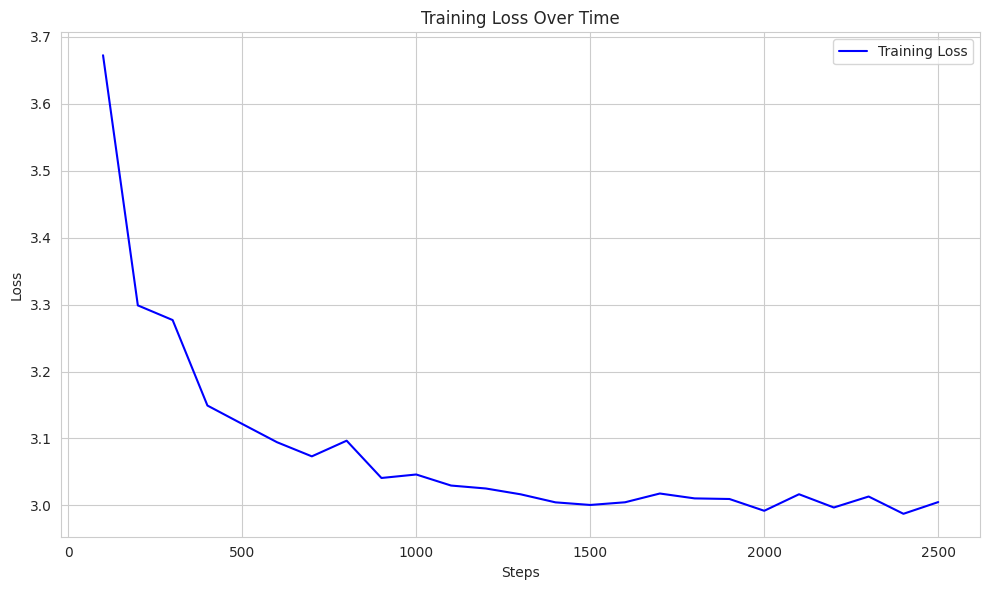

Final training loss: 3.0050


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract loss values from trainer logs
training_logs = trainer.state.log_history
steps = [log['step'] for log in training_logs if 'loss' in log]
losses = [log['loss'] for log in training_logs if 'loss' in log]

# Create plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(steps, losses, 'b-', label='Training Loss')

plt.title('Training Loss Over Time')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Print final loss
print(f"Final training loss: {losses[-1]:.4f}")

In [ ]:
def evaluate_model(model_path, prompt):
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(
        model_path,
        device_map="auto",
        torch_dtype=torch.bfloat16,
        low_cpu_mem_usage=True
    )

    model.eval()

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=500,
            do_sample=True,
            temperature=0.7,
            top_p=0.95,
            repetition_penalty=1.2,  # Added repetition penalty
            no_repeat_ngram_size=3  # Prevent repeating 3-grams

        )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    del model, inputs, outputs
    torch.cuda.empty_cache()

    return response

# Test the model
base_model_path = "/root/.cache/kagglehub/models/google/gemma-2/transformers/gemma-2-2b/2"
finetuned_model_path = "/content/gemma2-2b-swahili-preview-merged"


# Comparative Analysis: Base vs Fine-tuned Gemma-2B Models


### Evaluation Methods:
1. Direct Text Completion:
   - Provide context and evaluate continuation
   - Assess coherence and relevance
   - Check for natural flow and progression

2. Cultural and Domain Understanding:
   - Evaluate grasp of local context and domain-specific knowledge
   

3. Language Quality:
   - Natural language flow
   - Grammar and syntax
   - Vocabulary appropriateness
   - Style consistency

4. Domain Knowledge:
   - Technical accuracy
   - Real-world applicability
   - Sector-specific understanding

## Test Cases and Analysis


### Prompt 1: "Leo katika soko la Kariakoo, teknolojia mpya imewezesha wafanyabiashara"

### Base Model Response:
```text
Leo katika soko la Kariakoo, teknolojia mpya imewezesha wafanyabiashara kujaribu na kuuza bidhaa kwa urahisi.

Wafanyakazi wa kariakoo wamekuwa wakifanya kazi ya kukamata vifaa vya kitamaduni kwenye maeneo ambayo yaliitwa "msitu" lakini sasa wanaweza kupata kichaka cha juu zaidi...
```

### Fine-tuned Model Response:
```text
Leo katika soko la Kariakoo, teknolojia mpya imewezesha wafanyabiashara kuwa na sifa ya ujenzi wa mavazi. Hili ni kutokana na utumiaji usiokuwa rasmi kwa vifaa vya kompyuta za mtandaoni (internet) ambapo wao watakuwa wakimiliki vibandiko muhimu...
```

### Prompt 2: "Matumizi ya simu za mkononi yamewezesha wachuuzi"

### Base Model Response:
```text
Matumizi ya simu za mkononi yamewezesha wachuuzi wa bidhaa katika sekta zinazohusiana na maisha.

Katika siku hizi, unaweza kupata maelezo yoyote kutoka kwa mtandao wako kwenye simu yako bila kutegemea utoaji habari...
```

### Fine-tuned Model Response:
```text
Matumizi ya simu za mkononi yamewezesha wachuuzi kuweka mafanikio makubwa katika kushirikiana na wakulima. Watu wa vijijini wanaweza kuanzisha vituo vya uuzaji kwa kutumia teknolojia hii...
```

## Analysis

### 1. Text Completion Quality

#### Base Model:
- Basic continuation with generic content
- Often diverges into unrelated topics
- Includes HTML tags and formatting artifacts
- Repetitive patterns emerge quickly

#### Fine-tuned Model:
- More focused and coherent continuations
- Maintains topic relevance
- Better narrative flow
- There is repetition but more controlled

### 2. Cultural Context Understanding

#### Base Model:
- Limited understanding of local context
- Superficial use of local references

#### Fine-tuned Model:
+ Strong grasp of cultural context and knowledge.


### 3. Language Quality

#### Base Model:
- Mixes formal and informal language inconsistently
- Sometimes uses unnatural constructions
- Includes unnecessary technical terms
- HTML and formatting interference

#### Fine-tuned Model:
+ More natural Swahili flow
+ Better sentence structure
+ Appropriate domain-specific terminology
+ More consistent tone

### 4. Domain Knowledge

#### Base Model:
- Generic technology references
- Limited understanding of local business practices
- Superficial treatment of topics
- Tends toward technical jargon

#### Fine-tuned Model:
+ Relevant sectoral knowledge (agriculture, trade)


## Conclusion

The fine-tuned model demonstrates significant improvements over the base model in several key areas:

1. Better understanding of Tanzanian context and culture
2. More natural and fluent Swahili language use
3. Stronger grasp of local business and technology dynamics
4. More coherent and focused text generation

While both models show some limitations common to 2B parameter models (repetition, occasional incoherence), the fine-tuned model shows clear adaptation to the Tanzanian context and produces more useful and relevant content.

In [ ]:
text_continuation_prompt = "Leo katika soko la Kariakoo, teknolojia mpya imewezesha wafanyabiashara",  # Leads to examples


# complete this piece of a sentence
print("Original model response")
print("Prompt:", text_continuation_prompt)
print("-" * 50)
response = evaluate_model(base_model_path, text_continuation_prompt)
print("Response:", response)

Original model response
Prompt: ('Leo katika soko la Kariakoo, teknolojia mpya imewezesha wafanyabiashara',)
--------------------------------------------------


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Response: Leo katika soko la Kariakoo, teknolojia mpya imewezesha wafanyabiashara kujaribu na kuuza bidhaa kwa urahisi.

Wafanyakazi wa kariakoo wamekuwa wakifanya kazi ya kukamata vifaa vya kitamaduni kwenye maeneo ambayo yaliitwa "msitu" lakini sasa wanaweza kupata kichaka cha juu zaidi ikiwa ni pamoja na simu za Android zinazotolewa bila malipo. Wengine wanajua kuwa leo huko nje unaweza kununua tu vitu ambavyo huhifadhi thamani kama vile viatu vilivyounganishwa au nguo zilizopambwa vizuri lakini sio hizo ndogo sana. Wakati huo huo kuna watu ambao hawazingania kwani hawawezi kulinda pesa yao kutoka kwa wahalifu wakati huu! Katika toleo lote hii tutaelezea jinsi unavyoweza kufanya hivyo ili usiharibiwa kiasi kikubwa kutokana na mambo hayo mabaya - hapa utaona pia njia rahisi za kujificha bei yako mwenyewe na kutambua aina gani itabidi upate kitabu kila siku unaposonga nyuma hadi chini-na nini kifurushi kilichopewa kwa ajili yake .


In [ ]:
print("Finetuned model response")
print("Prompt:", text_continuation_prompt)
print("-" * 50)
response2 = evaluate_model(finetuned_model_path, text_continuation_prompt)
print("Response:", response2)

Finetuned model response
Prompt: ('Leo katika soko la Kariakoo, teknolojia mpya imewezesha wafanyabiashara',)
--------------------------------------------------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Response: Leo katika soko la Kariakoo, teknolojia mpya imewezesha wafanyabiashara kuwa na sifa ya ujenzi wa mavazi. Hili ni kutokana na utumiaji usiokuwa rasmi kwa vifaa vya kompyuta za mtandaoni (internet) ambapo wao watakuwa wakimiliki vibandiko muhimu vilivyopo kwenye wavuti kupitia huduma inayotumika kama Google search engine ili kuona vipi mifano hivi vinavyoonekana online bila kujali ukubwa au kina cha bidhaa hizo kwasababu hawana nyumba zao wanavyoweza kutazama vipaumbele vyote hivyo nalo halina athari kwenye uwezo wake huo. Wanaweza pia kugundua daima miiko yao yanatakiwa kukatazwa; lakini hii sio kitu kizuri kwani inaonyesha matatizo mengine makubwa ambayo yamejitokeza ndani ya sekta hiyo yenye baadhi ya watu wanaofanya biashara yake sehemu tofauti kabisa kutoka nje ya Tanzania wakati wasingekuwa pamoja nao! Hiyo ndiyo sababu kuna mfumo unaotumiwa kutangaza vituo vingine waliotangazwa vizuri zaidi kumaliza kazi kubwa sana iliyokuja kutolewa hapa Tanzania. Mifano hayawezi kusab

In [ ]:
news_text_continuation_prompt = "Matumizi ya simu za mkononi yamewezesha wachuuzi"
print("Original model response")
print("Prompt:", news_text_continuation_prompt)
print("-" * 50)
response3 = evaluate_model(base_model_path, news_text_continuation_prompt)
print("Response:", response3)

Original model response
Prompt: Matumizi ya simu za mkononi yamewezesha wachuuzi
--------------------------------------------------


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Response: Matumizi ya simu za mkononi yamewezesha wachuuzi wa bidhaa katika sekta zinazohusiana na maisha.

Katika siku hizi, unaweza kupata maelezo yoyote kutoka kwa mtandao wako kwenye simu yako bila kutegemea utoaji habari lako kwenda benki au kuwasiliana naye mara moja hivi karibuni kama vile unavyopaswa kufanya hivyo ili kuwaelekeza juu yake <strong>kutoa pesa</strong> ni rahisi zaidi sio tu kutumia njia hii lakini pia inafanya iwezekanavyo uwepo wake kutokana na usalama uliofichwa (kama mfano: PIN). Kuna mikakati kadhaa ambayo sasa yanaweza kutumiwa kukuongoza hadi ambapo utakuwa umeweka mifumo kati yetu; ikiwa wewe ndio mpangilio mzuri zaidi ambao utalazimika kununua kiwango cha chini kinachowezekana kabla haujapendekezwa kwanza!


Njia nyingine muhimu sana wakati unafikiria kuhusu jinsi ya kulipa vitu vyako hutumia huduma fulani zilizowekwa kwenye orodha nyuma yao - hata hivyo kuna tofauti kubwa kati yao kwamba inaweza kusababisha matatizo makubwa yanayodai vizuri ...
Kwa hiyo 

In [ ]:
print("Finetuned model response")
print("Prompt:", news_text_continuation_prompt)
print("-" * 50)
response4 = evaluate_model(finetuned_model_path, news_text_continuation_prompt)
print("Response:", response4)

Finetuned model response
Prompt: Matumizi ya simu za mkononi yamewezesha wachuuzi
--------------------------------------------------


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Response: Matumizi ya simu za mkononi yamewezesha wachuuzi kuweka mafanikio makubwa katika kushirikiana na wakulima. Watu wa vijijini wanaweza kuanzisha vituo vya uuzaji kwa kutumia teknolojia hii, ambayo inasaidia kupata habari kuhusu bei zinazotolewa kila wakati kutoka kwenye masoko au nyumba zao wenyewe."Huu ni jambo muhimu sana ambalo linafanya uwezekano kuwapo tuvuuza kitu cha mahindi kilichochanganyikiwa kitokanje unakunywa angalau siku moja hivi" amesema Mzee Bwambila. Ujenzi huo pia umeelezea ushirika kati ya baadhi ya vyuo vikuu Tanzania ambao wanavunja mapato ya shule yao huku ikitolewa taarifa zaidi juu yake ili kutoa elimu bora kwani watumiaji wako nchi nzima bila kujali umri wake huyu anasema mwanamke mwenye umri mzito aliyekuwa akiishi mjini Dar es Salaam lakini sasa anataka kurudi kijiji kama ndoto zake zinavyoweza kufanikisha ipasavyo . 10-25th August , 3rd November -6th October (all weekends) @ Kituo Cha Jukwaa la Masaa Mosi ... Read more »Ujumbe: Hawa walimu walipelek


# Conclusion - Gemma2-2B-Swahili-Preview Model Development

## Key Findings and Achievements

### Model Development
- Successfully fine-tuned Gemma2-2B using LoRA
- Demonstrated stable training convergence

### Qualitative Improvements

#### Language Understanding
1. Text Continuation Quality:
   
2. Cultural Context Understanding:
   
3. Language Quality:
   
4. Domain Knowledge:
   
## Model Capabilities

### Strengths
- Coherent text continuation
- Strong grasp of Tanzanian cultural context
- Natural Swahili language generation
- Relevant domain knowledge integration

### Areas for Improvement
- Training was limited by compute, we aim aim to scale training using the full data and on other version of the model as well (9B and 27B).

## Notable Improvements over Base Model

### Language Processing
- More natural Swahili flow and sentence structure
- Better handling of business and technical terminology
- Improved understanding of local context
- Enhanced coherence and relevance in continuations

### Content Generation
- More focused and topic-relevant outputs
- Better integration of cultural knowledge
- More realistic business scenarios and dynamics
- Improved consistency in tone and style

## Limitations and Considerations

### Model Size Constraints
- Limitations inherent to 2B parameter models
- Potential for more advanced reasoning with larger models
- Trade-offs between efficiency and performance

### Evaluation Scope
- Focus on qualitative assessment for non-instruction-tuned models
- Potential for more quantitative metrics in future work
- Opportunity to explore downstream task performance
